In [61]:
# data source: https://archive.ics.uci.edu/dataset/222/bank+marketing

In [62]:
# Data description and problem statement

The project aims to predict the success of bank telemarketing. Data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution.  
The goal is to determine whether a client will subscribe to a bank term deposit. The attributes used for this prediction are:

**Bank client data:**
- Age (numeric)
- Job: type of job (categorical: "admin.", "blue-collar", "entrepreneur", "housemaid", "management", "retired", "self-employed", "services", "student", "technician", "unemployed", "unknown")
- Marital: marital status (categorical: "divorced", "married", "single", "unknown")
- Education (categorical: "basic.4y", "basic.6y", "basic.9y", "high.school", "illiterate", "professional.course", "university.degree", "unknown")
- Default: has credit in default? (categorical: "no", "yes", "unknown")
- Housing: has housing loan? (categorical: "no", "yes", "unknown")
- Loan: has personal loan? (categorical: "no", "yes", "unknown")

**Related with the last contact of the current campaign:**
- Contact: contact communication type (categorical: "cellular", "telephone")
- Month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
- Day_of_week: last contact day of the week (categorical: "mon", "tue", "wed", "thu", "fri")
- Duration: last contact duration, in seconds (numeric)

**Other attributes:**
- Campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
- Pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
- Previous: number of contacts performed before this campaign and for this client (numeric)
- Poutcome: outcome of the previous marketing campaign (categorical: "failure", "nonexistent", "success")

**Social and economic context attributes:**
- Emp.var.rate: employment variation rate - quarterly indicator (numeric)
- Cons.price.idx: consumer price index - monthly indicator (numeric)
- Cons.conf.idx: consumer confidence index - monthly indicator (numeric)
- Euribor3m: euribor 3 month rate - daily indicator (numeric)
- Nr.employed: number of employees - quarterly indicator (numeric)

**Output variable (desired target):**
- Y: has the client subscribed a term    "no")sit? (binary: "yes","no")



In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_curve, auc, confusion_matrix
from imblearn.over_sampling import ADASYN
from scipy.stats import zscore

%matplotlib inline

In [64]:
df = pd.read_csv('bank-additional-full.csv', delimiter = ';')

In [65]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [67]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [68]:
# data cleaning and inspection

In [69]:
# Checking duplicates
df.loc[df.duplicated()]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
12261,36,retired,married,unknown,no,no,no,telephone,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
14234,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16956,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
18465,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
20216,55,services,married,high.school,unknown,no,no,cellular,aug,mon,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
20534,41,technician,married,professional.course,no,yes,no,cellular,aug,tue,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
25217,39,admin.,married,university.degree,no,no,no,cellular,nov,tue,...,2,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,no
28477,24,services,single,high.school,no,yes,no,cellular,apr,tue,...,1,999,0,nonexistent,-1.8,93.075,-47.1,1.423,5099.1,no
32516,35,admin.,married,university.degree,no,yes,no,cellular,may,fri,...,4,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no


In [70]:
# removing duplicates
df = df.drop_duplicates()

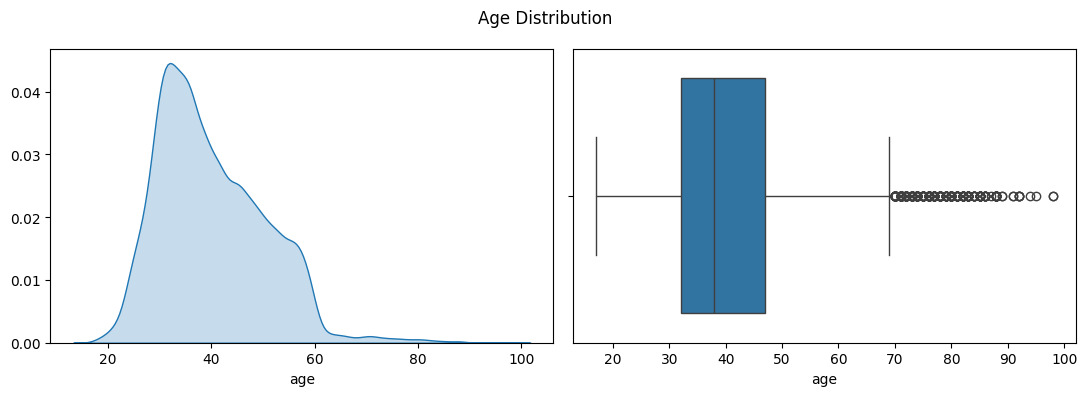

In [71]:
# Checking Age Distribution

fig, ax = plt.subplots(1, 2, figsize=(11, 4))

# KDE plot
sns.kdeplot(data=df, x='age', ax=ax[0], fill = True)
ax[0].set_ylabel('')

# Boxplot
sns.boxplot(data=df, x='age', ax=ax[1])

# Set main title for all subplots
plt.suptitle('Age Distribution')

plt.tight_layout()
plt.show()

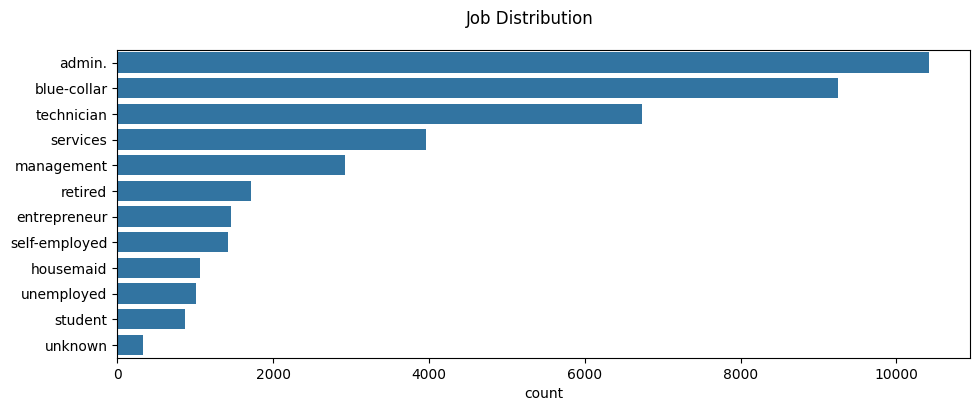

In [72]:
# Checking job Distribution

# Get the order of categories
order = df['job'].value_counts().index

# Set figure size
plt.figure(figsize=(11, 4))

# Create countplot
sns.countplot(data=df, y='job', order=order).set_ylabel('')

# Set main title for all subplots
plt.suptitle('Job Distribution')

plt.show()

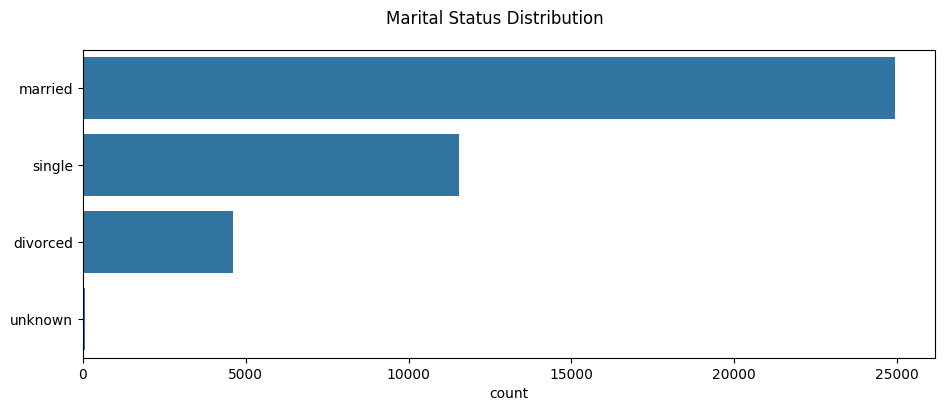

In [73]:
# Checking Marital Status Distribution

# Get the order of categories
order = df['marital'].value_counts().index

# Set figure size
plt.figure(figsize=(11, 4))

# Create countplot
sns.countplot(data=df, y='marital', order=order).set_ylabel('')

# Set main title for all subplots
plt.suptitle('Marital Status Distribution')

plt.show()

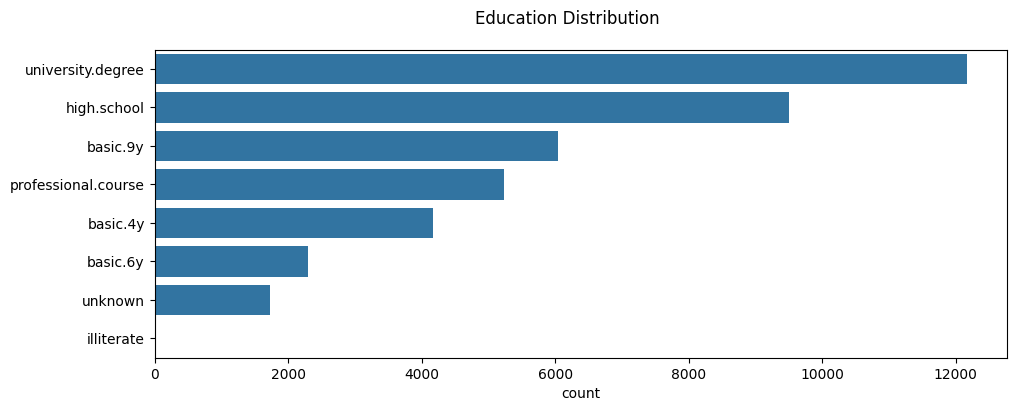

In [74]:
# Checking Marital Status Distribution

# Get the order of categories
order = df['education'].value_counts().index

# Set figure size
plt.figure(figsize=(11, 4))

# Create countplot
sns.countplot(data=df, y='education', order=order).set_ylabel('')

# Set main title for all subplots
plt.suptitle('Education Distribution')

plt.show()

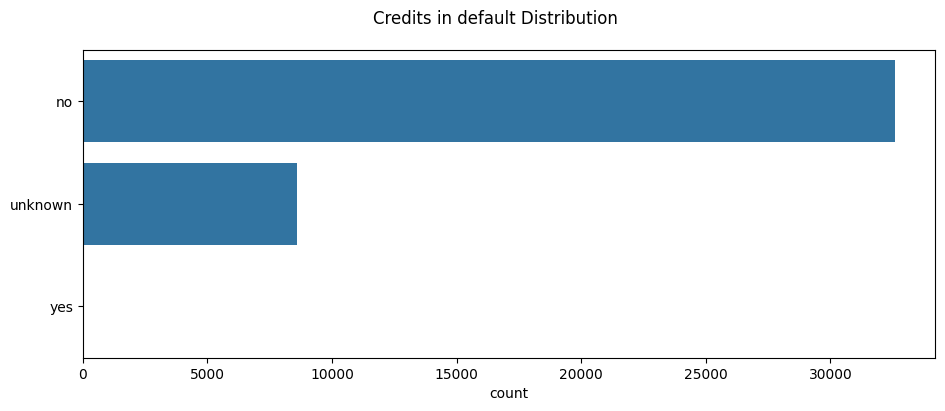

In [75]:
# Checking Marital Status Distribution

# Get the order of categories
order = df['default'].value_counts().index

# Set figure size
plt.figure(figsize=(11, 4))

# Create countplot
sns.countplot(data=df, y='default', order=order).set_ylabel('')

# Set main title for all subplots
plt.suptitle('Credits in default Distribution')

plt.show()

In [76]:
# As long as the data in this column has only NO and unknown values, it is not providing any useful information to our model.

# removing column

del df['default']

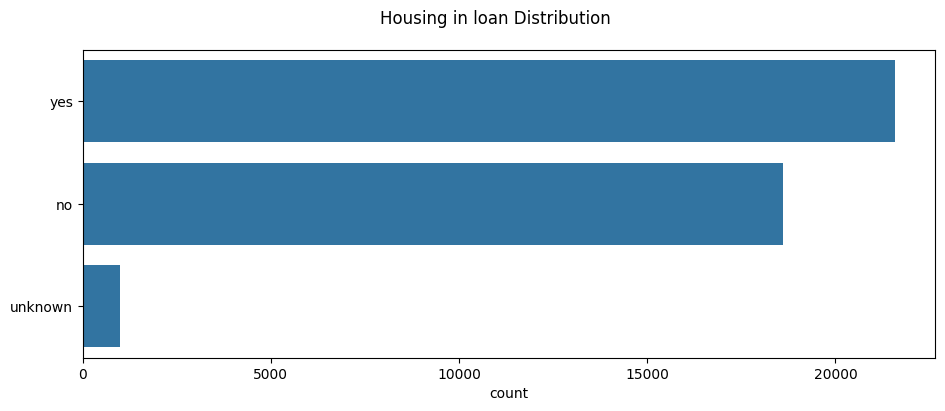

In [77]:
# Checking Marital Status Distribution

# Get the order of categories
order = df['housing'].value_counts().index

# Set figure size
plt.figure(figsize=(11, 4))

# Create countplot
sns.countplot(data=df, y='housing', order=order).set_ylabel('')

# Set main title for all subplots
plt.suptitle('Housing in loan Distribution')

plt.show()

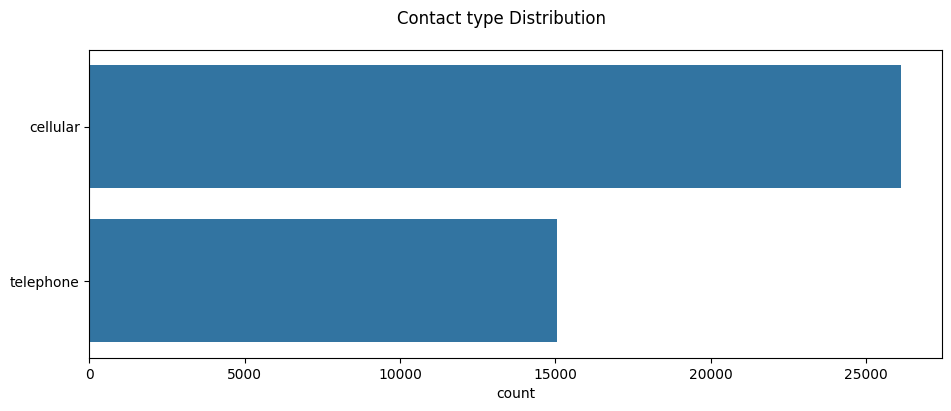

In [78]:
# Checking Marital Status Distribution

# Get the order of categories
order = df['contact'].value_counts().index

# Set figure size
plt.figure(figsize=(11, 4))

# Create countplot
sns.countplot(data=df, y='contact', order=order).set_ylabel('')

# Set main title for all subplots
plt.suptitle('Contact type Distribution')

plt.show()

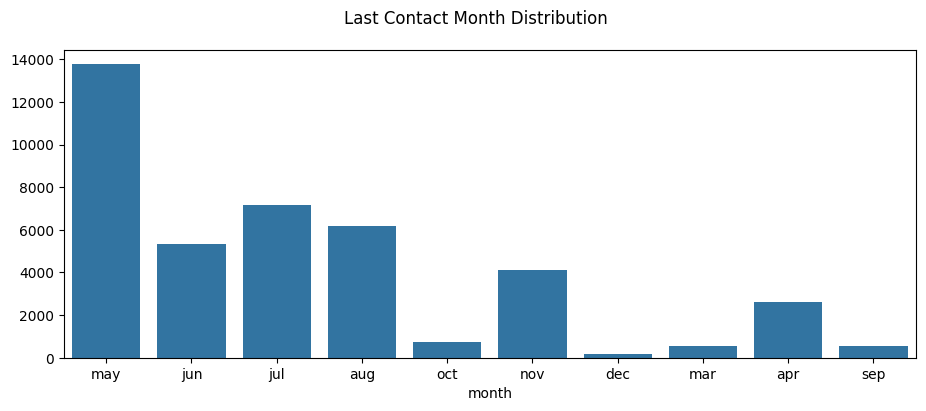

In [79]:
# Last Contact Month Distribution Distribution

# Set figure size
plt.figure(figsize=(11, 4))

# Create countplot
sns.countplot(data=df, x='month').set_ylabel('')

# Set main title for all subplots
plt.suptitle('Last Contact Month Distribution')

plt.show()

In [80]:
# Converting month names to numbers
df['month'] = df['month'].apply(lambda x: datetime.strptime(x, '%b').month)

# We assume that the dataset was provided in January, so values in this column should be calculated in relation to the dataset date (e.g., difference in month).

df['month'] = 13 - df['month']

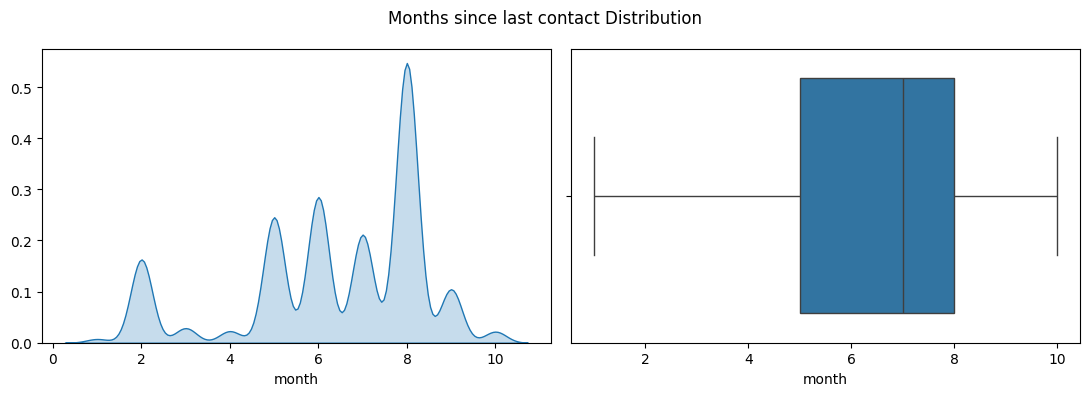

In [81]:
# Checking updated Distribution

fig, ax = plt.subplots(1, 2, figsize=(11, 4))

# KDE plot
sns.kdeplot(data=df, x='month', ax=ax[0], fill = True)
ax[0].set_ylabel('')

# Boxplot
sns.boxplot(data=df, x='month', ax=ax[1])

# Set main title for all subplots
plt.suptitle('Months since last contact Distribution')

plt.tight_layout()
plt.show()

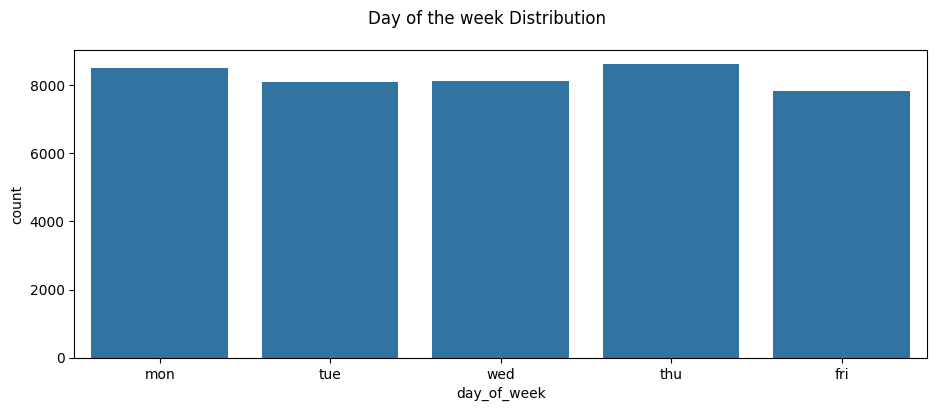

In [82]:
# Day of the week Distribution Distribution

# Set figure size
plt.figure(figsize=(11, 4))

# Create countplot
sns.countplot(data=df, x='day_of_week')

# Set main title for all subplots
plt.suptitle('Day of the week Distribution')

plt.show()

In [83]:
# converting day of the week to number

df['day_of_week'] = df['day_of_week'].map({'mon' : 1, 'tue' : 2, 'wed' : 3, 'thu' : 4, 'fri' : 5})

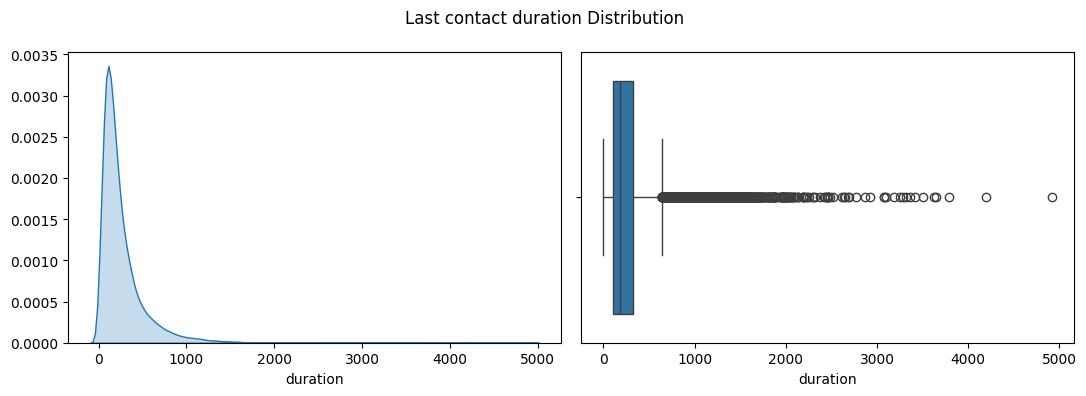

In [84]:
# Checking Duration Distribution

fig, ax = plt.subplots(1, 2, figsize=(11, 4))

# KDE plot
sns.kdeplot(data=df, x='duration', ax=ax[0], fill = True)
ax[0].set_ylabel('')

# Boxplot
sns.boxplot(data=df, x='duration', ax=ax[1])

# Set main title for all subplots
plt.suptitle('Last contact duration Distribution')

plt.tight_layout()
plt.show()

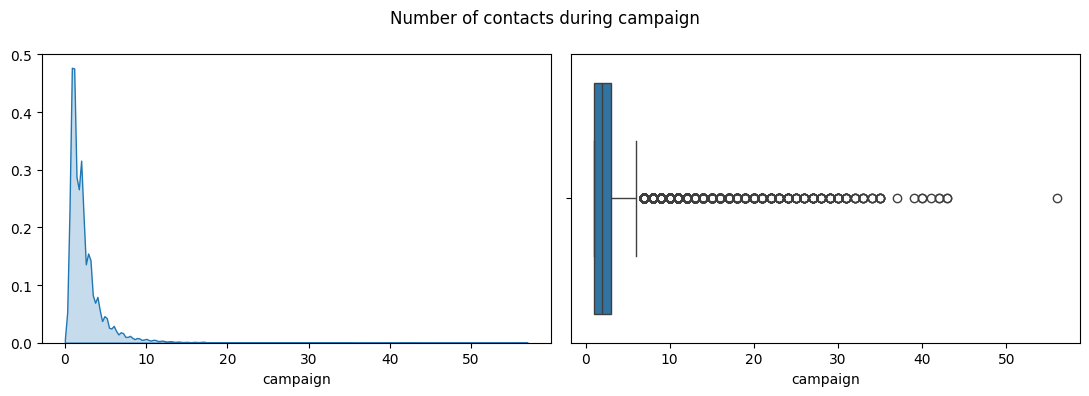

In [85]:
# Checking Number of contacts during campaign Distribution

fig, ax = plt.subplots(1, 2, figsize=(11, 4))

# KDE plot
sns.kdeplot(data=df, x='campaign', ax=ax[0], fill = True)
ax[0].set_ylabel('')

# Boxplot
sns.boxplot(data=df, x='campaign', ax=ax[1])

# Set main title for all subplots
plt.suptitle('Number of contacts during campaign')

plt.tight_layout()
plt.show()

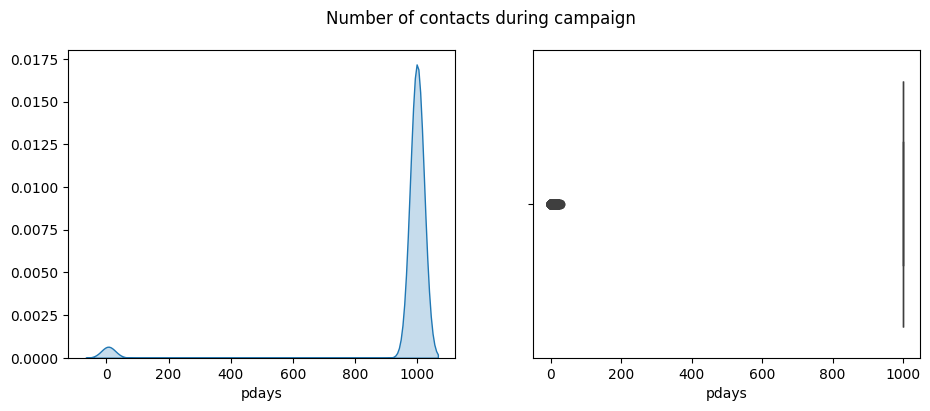

In [86]:
# Checking contacts Distribution

fig, ax = plt.subplots(1, 2, figsize=(11, 4))

# KDE plot
sns.kdeplot(data=df, x='pdays', ax=ax[0], fill = True)
ax[0].set_ylabel('')

# Boxplot
sns.boxplot(data=df, x='pdays', ax=ax[1])

# Set main title for all subplots
plt.suptitle('Number of contacts during campaign')

plt.show()

In [87]:
# As long as values are mostly equal to 999, that means the client was not previously contacted, and the feature is not helping us in prediction.

# Deleting the column

del df['pdays']

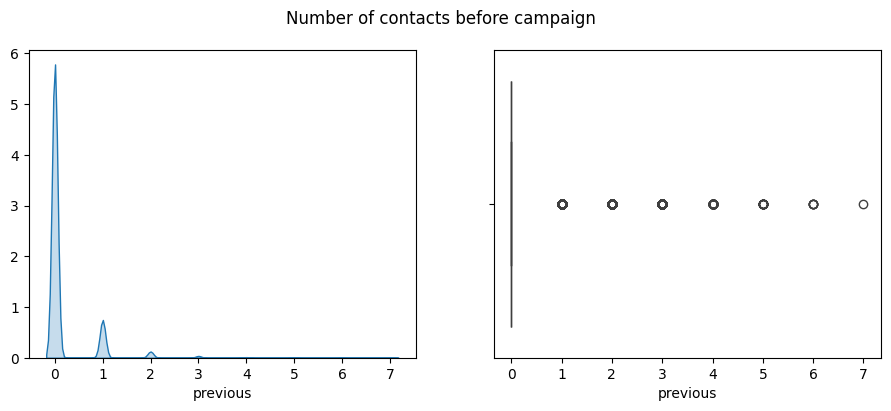

In [88]:
# Checking campaign Distribution

fig, ax = plt.subplots(1, 2, figsize=(11, 4))

# KDE plot
sns.kdeplot(data=df, x='previous', ax=ax[0], fill = True)
ax[0].set_ylabel('')

# Boxplot
sns.boxplot(data=df, x='previous', ax=ax[1])

# Set main title for all subplots
plt.suptitle('Number of contacts before campaign')

plt.show()

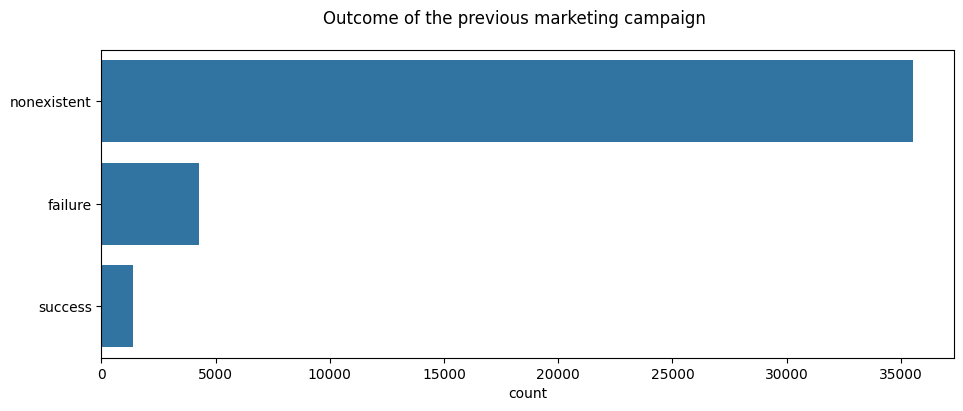

In [89]:
# Checking outcome Distribution

# Get the order of categories
order = df['poutcome'].value_counts().index

# Set figure size
plt.figure(figsize=(11, 4))

# Create countplot
sns.countplot(data=df, y='poutcome', order=order).set_ylabel('')

# Set main title for all subplots
plt.suptitle('Outcome of the previous marketing campaign')

plt.show()

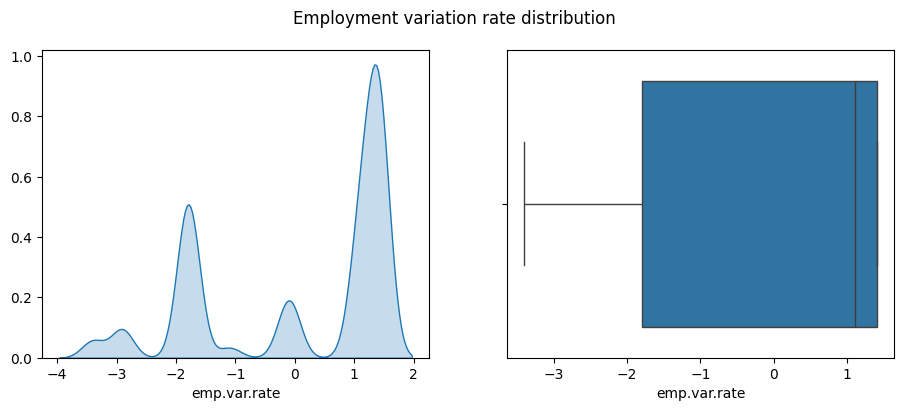

In [90]:
# Checking variation Distribution

fig, ax = plt.subplots(1, 2, figsize=(11, 4))

# KDE plot
sns.kdeplot(data=df, x='emp.var.rate', ax=ax[0], fill = True)
ax[0].set_ylabel('')

# Boxplot
sns.boxplot(data=df, x='emp.var.rate', ax=ax[1])

# Set main title for all subplots
plt.suptitle('Employment variation rate distribution')

plt.show()

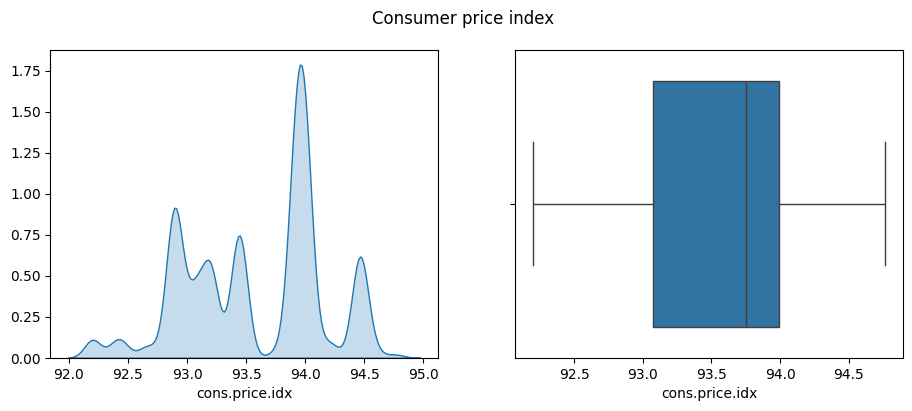

In [91]:
# Checking price Distribution

fig, ax = plt.subplots(1, 2, figsize=(11, 4))

# KDE plot
sns.kdeplot(data=df, x='cons.price.idx', ax=ax[0], fill = True)
ax[0].set_ylabel('')

# Boxplot
sns.boxplot(data=df, x='cons.price.idx', ax=ax[1])

# Set main title for all subplots
plt.suptitle('Consumer price index')

plt.show()

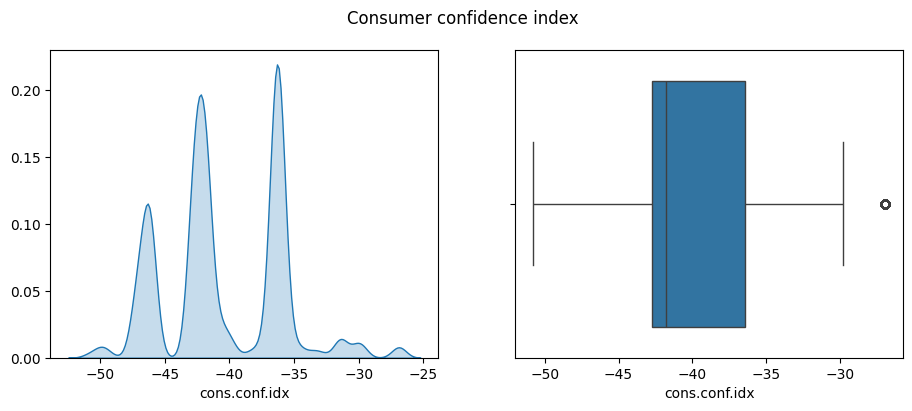

In [92]:
# Checking confidence Distribution

fig, ax = plt.subplots(1, 2, figsize=(11, 4))

# KDE plot
sns.kdeplot(data=df, x='cons.conf.idx', ax=ax[0], fill = True)
ax[0].set_ylabel('')

# Boxplot
sns.boxplot(data=df, x='cons.conf.idx', ax=ax[1])

# Set main title for all subplots
plt.suptitle('Consumer confidence index')

plt.show()

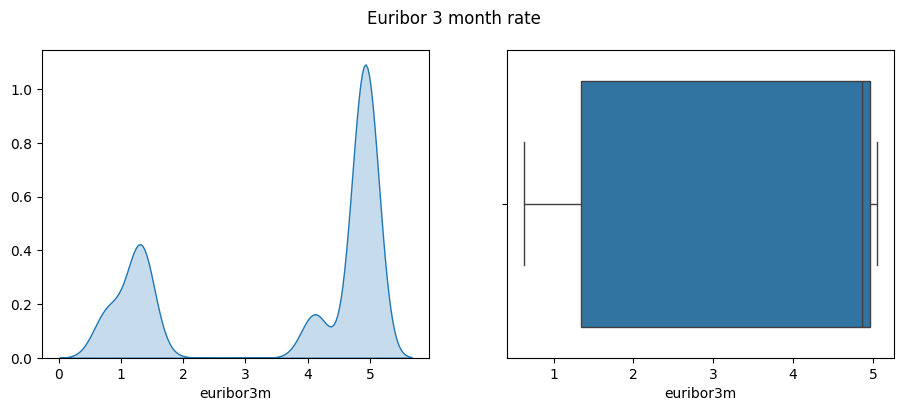

In [93]:
# Checking Euribor rate Distribution

fig, ax = plt.subplots(1, 2, figsize=(11, 4))

# KDE plot
sns.kdeplot(data=df, x='euribor3m', ax=ax[0], fill = True)
ax[0].set_ylabel('')

# Boxplot
sns.boxplot(data=df, x='euribor3m', ax=ax[1])

# Set main title for all subplots
plt.suptitle('Euribor 3 month rate')

plt.show()

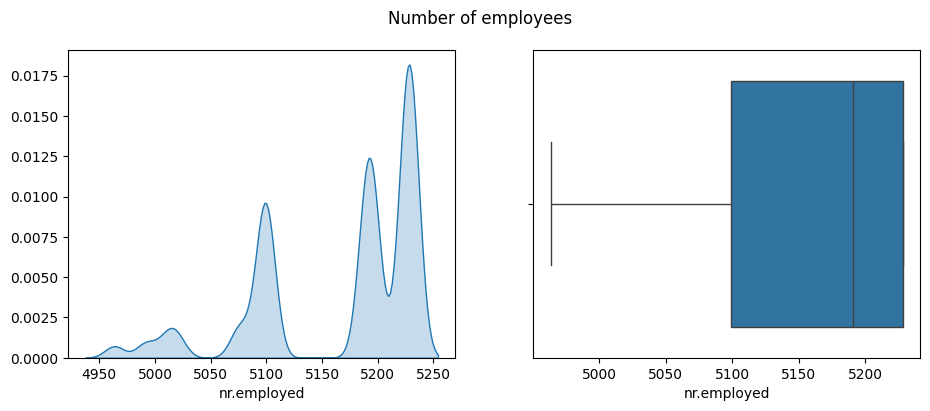

In [94]:
# Checking employees Distribution

fig, ax = plt.subplots(1, 2, figsize=(11, 4))

# KDE plot
sns.kdeplot(data=df, x='nr.employed', ax=ax[0], fill = True)
ax[0].set_ylabel('')

# Boxplot
sns.boxplot(data=df, x='nr.employed', ax=ax[1])

# Set main title for all subplots
plt.suptitle('Number of employees')

plt.show()

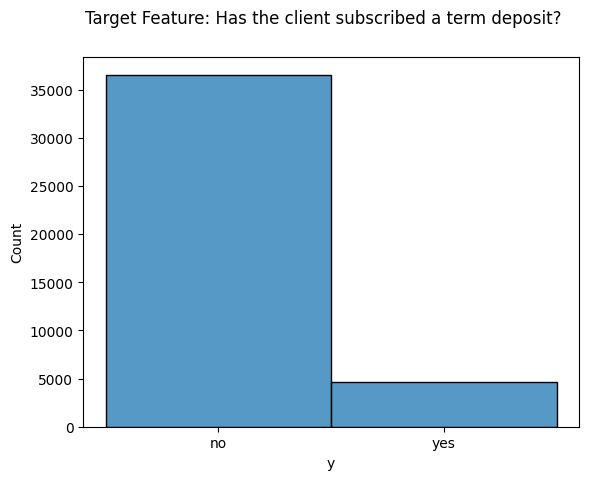

In [95]:
# Set main title
plt.suptitle('Target Feature: Has the client subscribed a term deposit?')

sns.histplot(data = df, x = 'y')

plt.show()

In [96]:
# Target feature is imbalanced

# Changing categories to numbers

df['y'] = df['y'].map({'no' : 0, 'yes' : 1})

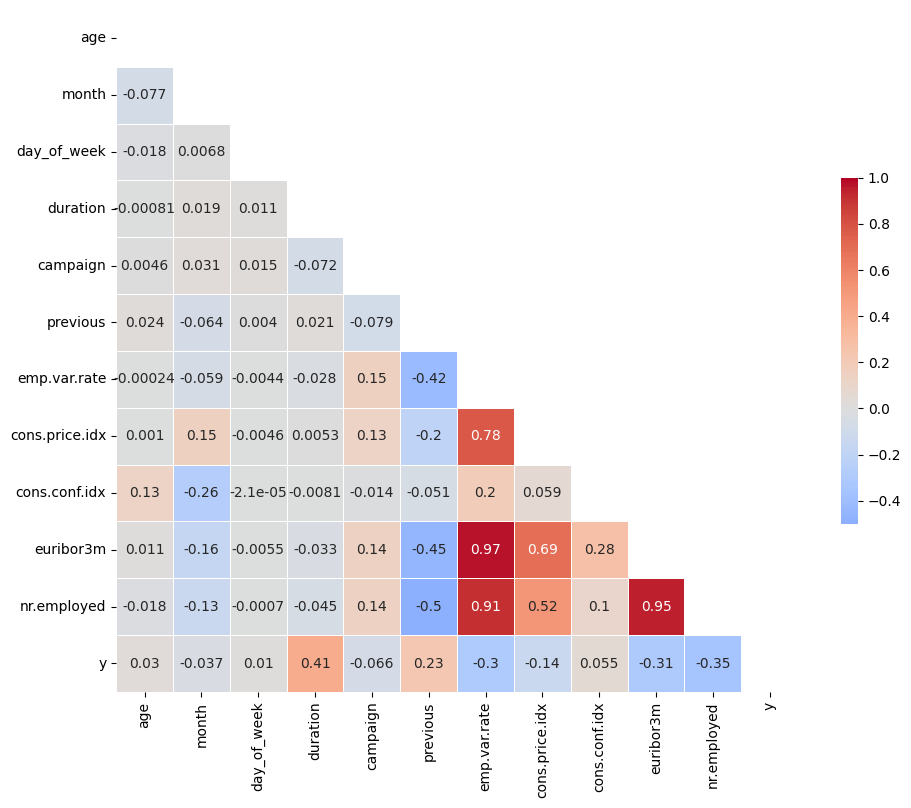

In [97]:
# Checking correlation

# Select numerical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Calculate correlation matrix
corr = df[numerical_cols].corr()

# Mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap='coolwarm', vmax=1.0, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot = True)

plt.show()

### There are 3 high correlated  features and they should be transformed using PCA (Principal component analysis):

- Euribor 3 month rate
- Employment variation rate
- Quarter number of employees.


In [98]:
# PCA transformation
features = ["euribor3m", "emp.var.rate", "nr.employed"]

# Performing PCA on the combination of features
pca = PCA(n_components=1)
df['principal_component'] = pca.fit_transform(df[features]).flatten()

# Drop the original features from df
df.drop(columns=features, inplace=True, errors='ignore')

In [99]:
# Detecting outliers

# Selecting only numeric columns from df
numerical_df = df.select_dtypes(include=[np.number])

# Calculating z-scores
z_scores = numerical_df.apply(zscore)

# Get rows where any column has an absolute z-score > 3
outlier_rows = df[(np.abs(z_scores) > 3).any(axis=1)]

# Print outlier rows
outlier_rows

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,previous,poutcome,cons.price.idx,cons.conf.idx,y,principal_component
37,52,technician,married,basic.9y,yes,no,telephone,8,1,1666,1,0,nonexistent,93.994,-36.4,0,-24.002404
75,41,blue-collar,divorced,basic.4y,yes,no,telephone,8,1,1575,1,0,nonexistent,93.994,-36.4,1,-24.002404
83,49,entrepreneur,married,university.degree,yes,no,telephone,8,1,1042,1,0,nonexistent,93.994,-36.4,1,-24.002404
88,49,technician,married,basic.9y,no,no,telephone,8,1,1467,1,0,nonexistent,93.994,-36.4,1,-24.002404
164,39,services,divorced,high.school,no,no,telephone,8,1,2033,1,0,nonexistent,93.994,-36.4,0,-24.002404
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41174,62,retired,married,university.degree,yes,no,cellular,2,4,208,1,6,success,94.767,-50.8,1,203.425045
41175,34,student,single,unknown,yes,no,cellular,2,4,180,1,2,failure,94.767,-50.8,0,203.425045
41178,62,retired,married,university.degree,no,no,cellular,2,4,483,2,3,success,94.767,-50.8,1,203.425045
41183,73,retired,married,professional.course,yes,no,cellular,2,5,334,1,0,nonexistent,94.767,-50.8,1,203.425113


In [100]:
# removing outliers

df = df.drop(outlier_rows.index)

In [101]:
# Encoding categorical features:

df= pd.get_dummies(df, drop_first=True)

In [102]:
# Transforming skewed features

df['age'] = np.sqrt(df['age'])
df['duration'] = np.sqrt(df['duration'])
df['campaign'] = np.sqrt(df['campaign'])
df['previous'] = np.sqrt(df['previous'])

In [103]:
# Dataset resampling

# Define features and target
X = df.drop('y', axis=1)
y = df['y']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define ADASYN
adasyn = ADASYN(sampling_strategy='auto', random_state=42)

# Apply ADASYN to the training data
X_resampled, y_resampled = adasyn.fit_resample(X_train, y_train)

# Combine the resampled features and target into a new dataframe
df = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.DataFrame(y_resampled, columns=['y'])], axis=1)

In [104]:
df.y.value_counts()

y
1    27891
0    27749
Name: count, dtype: int64

In [105]:
# Train/Test split and feature scaling

# Defining features and target
X = df.drop('y', axis=1)  # assuming 'y' is the name of your target column
y = df['y']

# Performing train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing a scaler
scaler = StandardScaler()

# Fitting the scaler on the training data and transform
X_train = scaler.fit_transform(X_train)

# Transform the test data
X_test = scaler.transform(X_test)

In [106]:
# Initialize the model
model = LogisticRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.90      0.90      5463
           1       0.91      0.90      0.90      5665

    accuracy                           0.90     11128
   macro avg       0.90      0.90      0.90     11128
weighted avg       0.90      0.90      0.90     11128



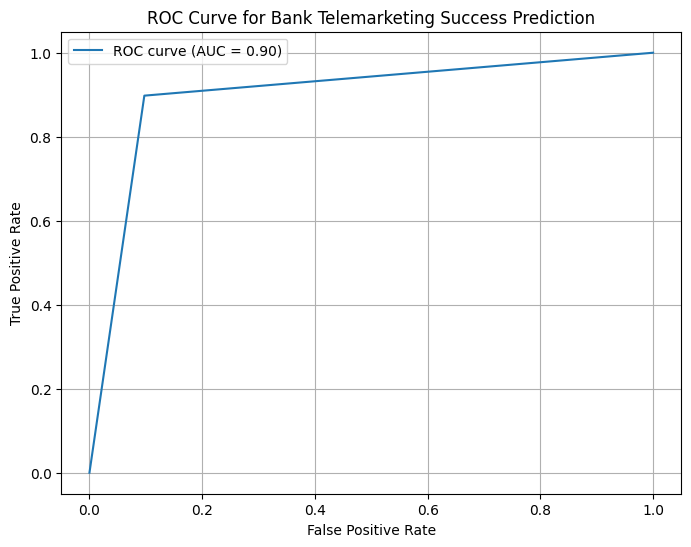

In [107]:
# Plotting ROC curve

# Calculate the ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Bank Telemarketing Success Prediction')
plt.legend()
plt.grid(True)
plt.show()

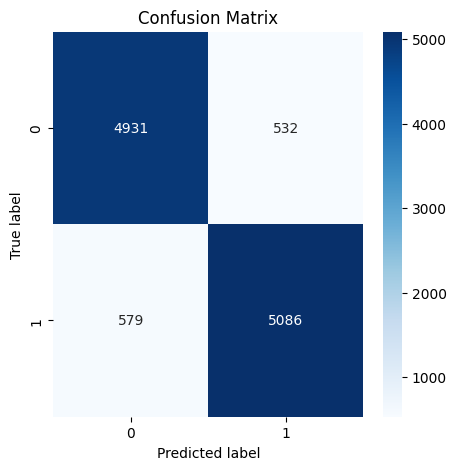

In [109]:
# Plotting confusion matrix

# Generating the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Creating a DataFrame from the confusion matrix
cm_df = pd.DataFrame(cm, index=[i for i in np.unique(y_test)], columns=[i for i in np.unique(y_test)])

plt.figure(figsize=(5,5))

# Visualizing the confusion matrix using Seaborn's heatmap
sns.heatmap(cm_df, annot=True, fmt='g', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

### Results:

The model achieves an accuracy of 90% on the test set, which means it can correctly classify 90% of the clients.  
The project also visualizes the confusion matrix and the ROC curve of the model to show its performance. In coonclusion I can say that logistic regression is a suitable algorithm for this problem and that the model can be used to help the bank improve its telemarketing strategy.